In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb

In [4]:
df = pd.read_json(open('nobel_winners_cleaned.json'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        858 non-null    object
 1   country         858 non-null    object
 2   date_of_birth   858 non-null    object
 3   date_of_death   559 non-null    object
 4   gender          858 non-null    object
 5   link            858 non-null    object
 6   name            858 non-null    object
 7   place_of_birth  831 non-null    object
 8   place_of_death  524 non-null    object
 9   text            858 non-null    object
 10  year            858 non-null    int64 
 11  award_age       858 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 80.6+ KB


In [6]:
# convert the date columns to a usable form
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [7]:
by_gender = df.groupby('gender')

<AxesSubplot:xlabel='gender'>

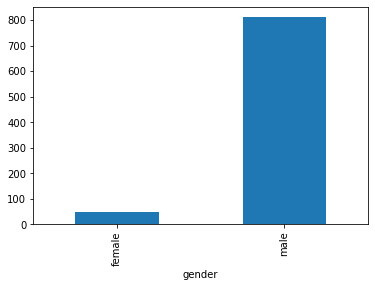

In [8]:
by_gender.size().plot(kind='bar')

In [9]:
by_gender.size()

gender
female     47
male      811
dtype: int64

In [10]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
267,Maria Goeppert-Mayer,1963
614,Marie Skłodowska-Curie,1903


In [11]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

<AxesSubplot:ylabel='category,gender'>

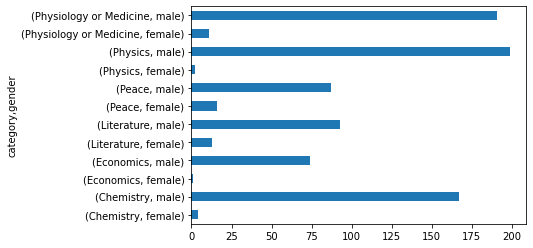

In [12]:
by_cat_gen.size().plot(kind='barh')

<AxesSubplot:ylabel='category'>

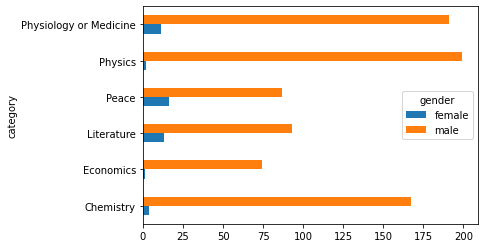

In [13]:
by_cat_gen.size().unstack().plot(kind='barh')

In [14]:
df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

,name,country,year
267,Maria Goeppert-Mayer,United States,1963
614,Marie Skłodowska-Curie,Poland,1903


<AxesSubplot:xlabel='year'>

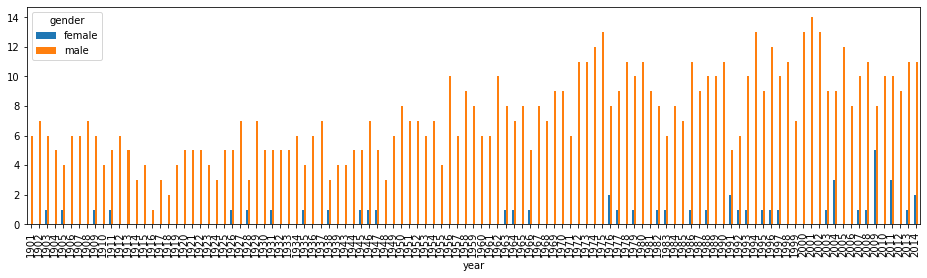

In [15]:
by_year_gender = df.groupby(['year','gender'])
year_sz = by_year_gender.size().unstack()
year_sz.plot(kind='bar',figsize=(16,4))

Text(0.5, 0, 'Year')

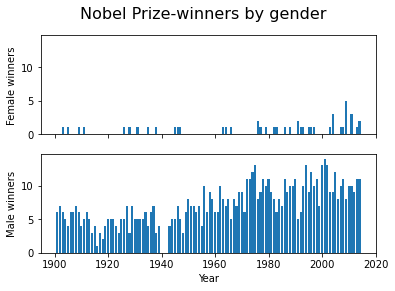

In [16]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

<AxesSubplot:xlabel='country'>

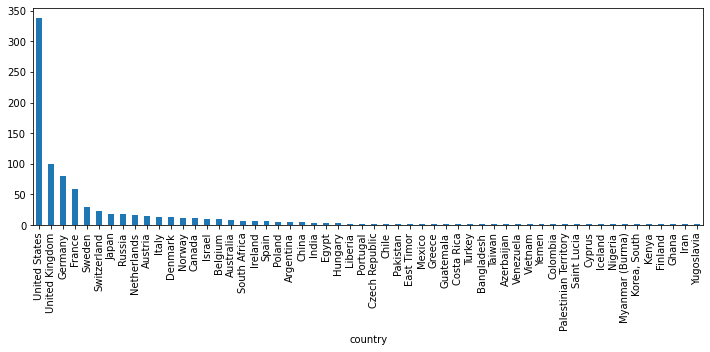

In [17]:
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))

In [19]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Cyprus', 'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Korea, South', 'Liberia', 'Mexico', 'Myanmar (Burma)',
       'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestinian Territory',
       'Poland', 'Portugal', 'Russia', 'Saint Lucia', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom',
       'United States', 'Venezuela', 'Vietnam', 'Yemen', 'Yugoslavia'],
      dtype='object', name='country')